# Trabajo de Aprendizaje No Supervisado

## Punto 1

- Modificar el **generador de dataset aleatorio** para que pueda generar **centroides en cantidades entre 1 y 20**.  
- Asegurar que exista una **distancia considerable entre los centroides**, para facilitar la **verificación visual** después del entrenamiento del modelo.  
- **Modificar y adecuar todos los códigos** para aplicar y demostrar la efectividad del modelo **K-Means**, junto con los métodos de evaluación:
  - **Método del codo**
  - **Silhouette Score**

In [37]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random

In [38]:
n_centers = random.randint(1, 8)

blob_centers = []
while len(blob_centers) < n_centers:
    candidate = np.random.uniform(-15, 15, size=2)
    if all(np.linalg.norm(candidate - center) > 8 for center in blob_centers):
        blob_centers.append(candidate)

blob_centers = np.array(blob_centers)
blob_std = np.full(n_centers, 1.2)

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)

print(f"Se generaron {n_centers} clusters")
print("Coordenadas de los centroides:")
print(blob_centers) 

Se generaron 7 clusters
Coordenadas de los centroides:
[[ -7.2915544    8.69029334]
 [  3.71423451   3.15701532]
 [ -8.67560457   0.11675765]
 [  7.42870273 -14.98017576]
 [  0.79105332  -7.58383846]
 [ -1.8338567   14.88548876]
 [ 13.44596612  -1.84283536]]


In [39]:
# # Generador de dataset aleatorio modificado
# # Número aleatorio de centros entre 1 y 20
# n_centers = random.randint(1, 20)

# # Generar centros aleatorios separados adecuadamente
# blob_centers = []
# while len(blob_centers) < n_centers:
#     candidate = np.random.uniform(-10, 10, size=2)
#     if all(np.linalg.norm(candidate - center) > 2 for center in blob_centers):
#         blob_centers.append(candidate)

# blob_centers = np.array(blob_centers)
# blob_std = np.full(n_centers, 2.0)  # desviación estándar uniforme

# # Generar el dataset
# X, y = make_blobs(n_samples=2000, centers=blob_centers,
#                   cluster_std=blob_std, random_state=42)

# print(f"Se generaron {n_centers} clusters")
# print("Coordenadas de los centroides:")
# print(blob_centers) 

In [40]:
# Función para graficar clusters
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0) 

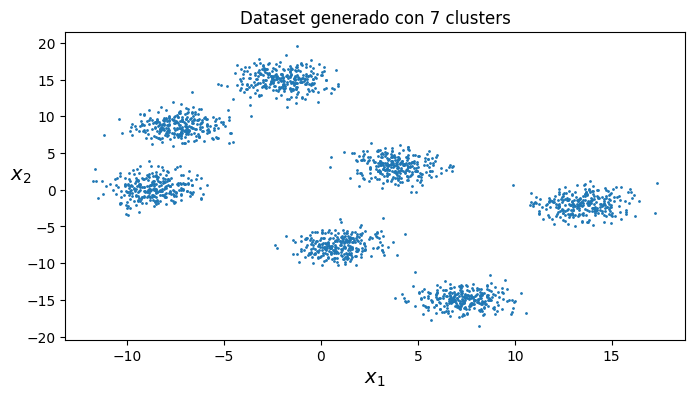

In [41]:
# Visualizar el dataset generado
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.title(f'Dataset generado con {n_centers} clusters')
plt.show()

In [42]:
# Aplicar K-Means con el número correcto de clusters
k = len(blob_centers)
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

print(f"K-Means aplicado con k={k} clusters")
print("Centroides encontrados por K-Means:")
print(kmeans.cluster_centers_)

K-Means aplicado con k=7 clusters
Centroides encontrados por K-Means:
[[ -8.65639941   0.23875726]
 [ 13.50385449  -1.95376091]
 [ -1.97884159  14.98263103]
 [  7.32878854 -14.9223327 ]
 [  0.90955836  -7.58545206]
 [ -7.31482722   8.67559595]
 [  3.88035811   3.2376295 ]]


In [43]:
# Funciones para visualización de resultados
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

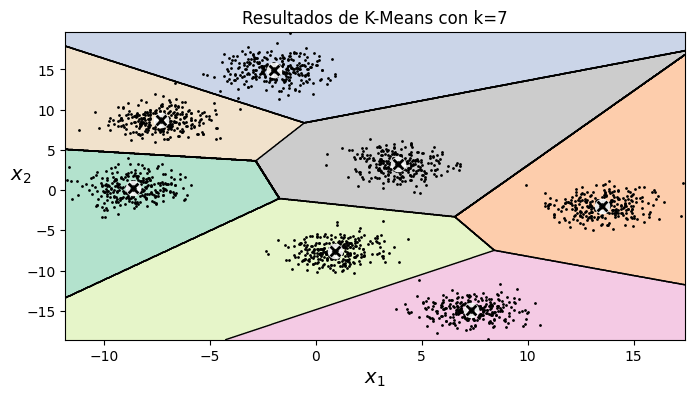

In [44]:
# Visualizar los resultados de K-Means
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.title(f'Resultados de K-Means con k={k}')
plt.show()

## Método del Codo (Elbow Method)

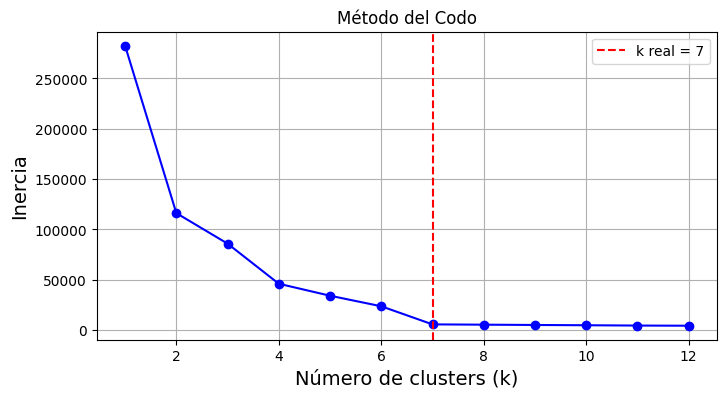

Número real de clusters: 7


In [45]:
# Método del Codo - calcular inercia para diferentes valores de k
max_k = min(20, len(blob_centers) + 5)  # no más de 20 clusters
inertias = []
k_range = range(1, max_k + 1)

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X)
    inertias.append(kmeans_temp.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, 'bo-')
plt.axvline(x=len(blob_centers), color='red', linestyle='--', label=f'k real = {len(blob_centers)}')
plt.xlabel('Número de clusters (k)', fontsize=14)
plt.ylabel('Inercia', fontsize=14)
plt.title('Método del Codo')
plt.legend()
plt.grid(True)
plt.show()

print(f"Número real de clusters: {len(blob_centers)}")

## Silhouette Score

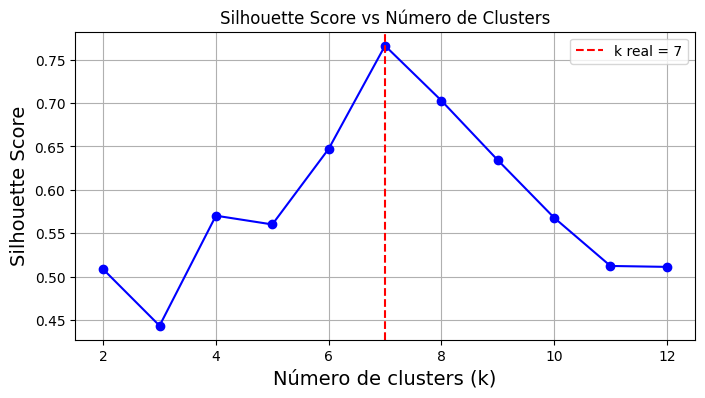

Silhouette Score para k=7 (número real): 0.766
Mejor k según Silhouette Score: 7 con score: 0.766


In [49]:
# Calcular Silhouette Score para diferentes valores de k
silhouette_scores = []
kmeans_models = []

# Calcular para k de 2 hasta max_k
for k in range(2, max_k + 1):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    y_pred_temp = kmeans_temp.fit_predict(X)
    score = silhouette_score(X, y_pred_temp)
    silhouette_scores.append(score)
    kmeans_models.append(kmeans_temp)

# Graficar Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(range(2, max_k + 1), silhouette_scores, 'bo-')
plt.axvline(x=len(blob_centers), color='red', linestyle='--', label=f'k real = {len(blob_centers)}')
plt.xlabel('Número de clusters (k)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Score vs Número de Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar el score para el número real de clusters
if len(blob_centers) >= 2:
    real_score = silhouette_score(X, kmeans.labels_)
    print(f"Silhouette Score para k={len(blob_centers)} (número real): {real_score:.3f}")
    
# Encontrar el mejor k según Silhouette Score
best_k = range(2, max_k + 1)[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"Mejor k según Silhouette Score: {best_k} con score: {best_score:.3f}")

Mostrando diagramas de silueta para k desde 2 hasta 8
Número real de clusters: 7
Valores de k a mostrar: [2, 3, 4, 5, 6, 7, 8]


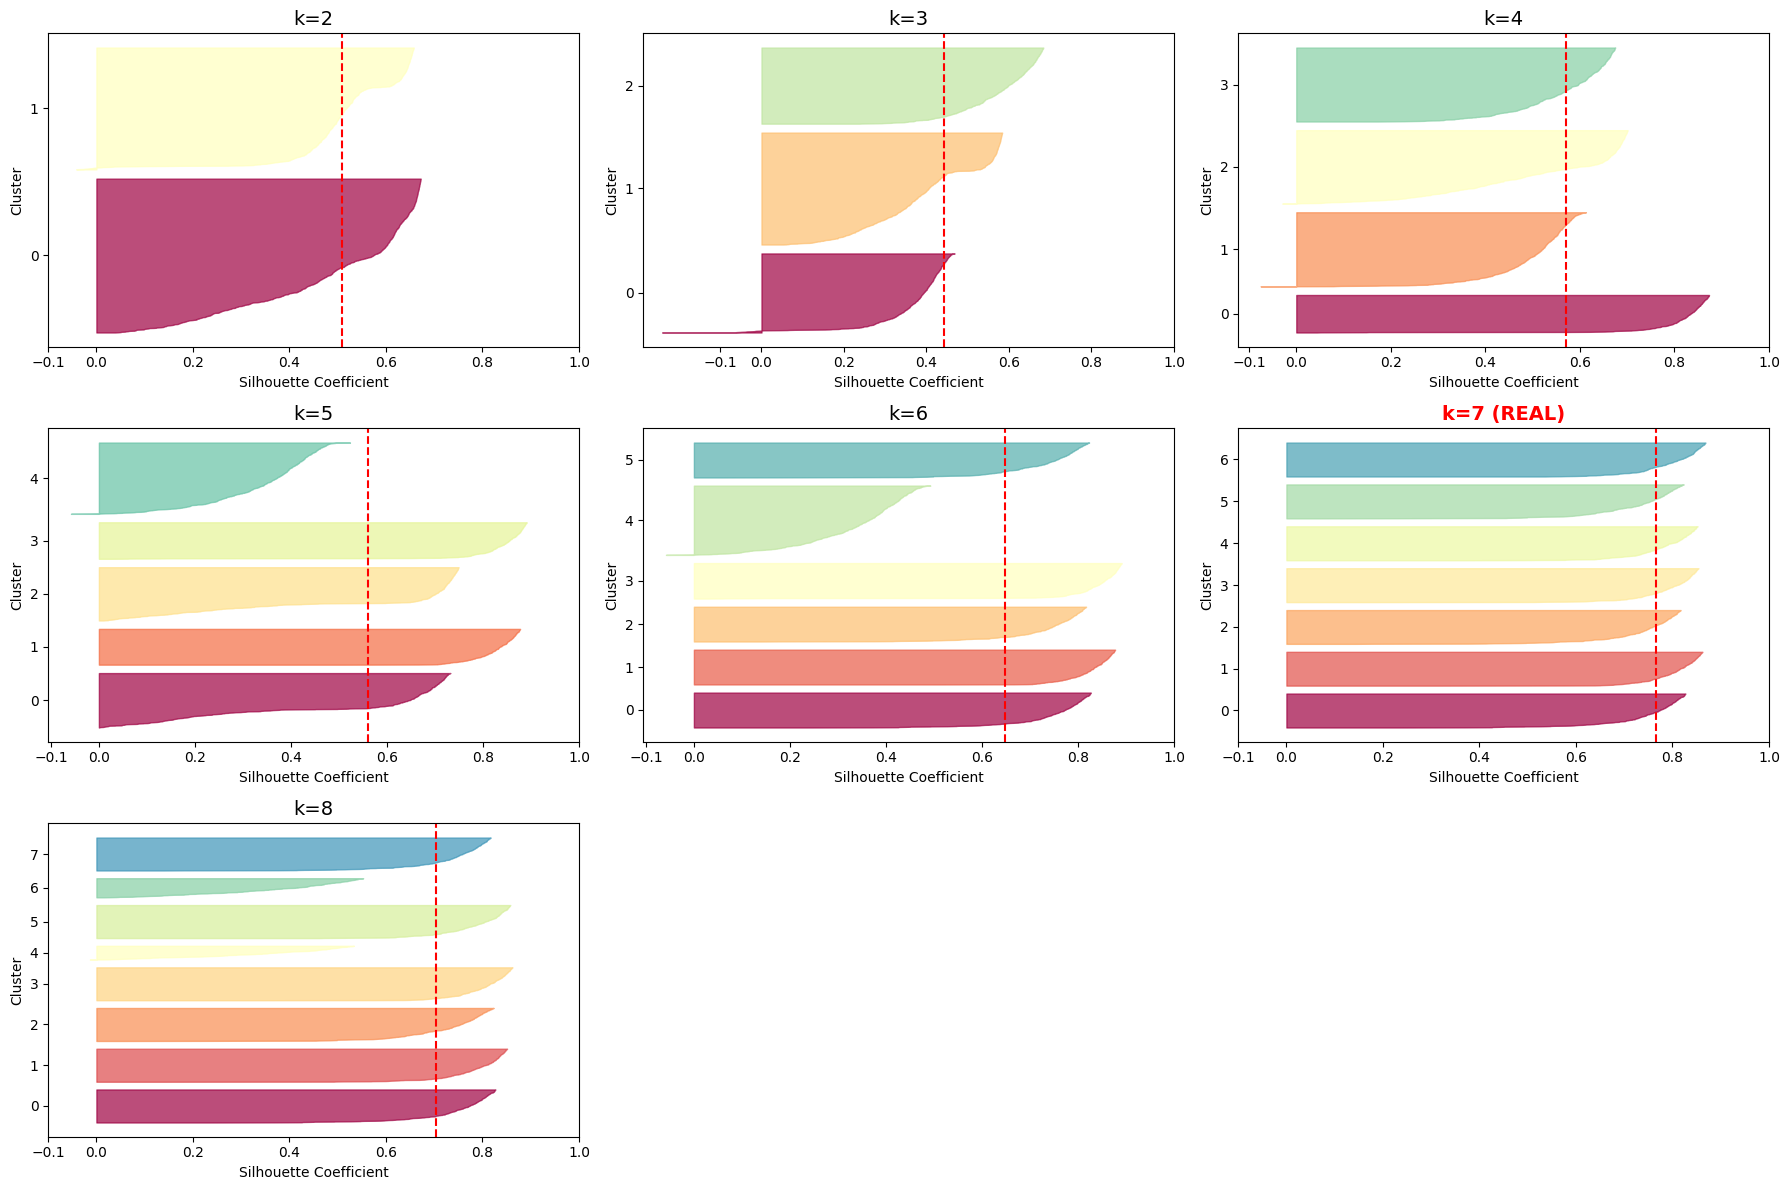

In [47]:
# Visualizar diagramas de silueta para diferentes valores de k
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

# Seleccionar valores de k dinámicamente basado en el número real de clusters
k_real = len(blob_centers)
# Mostrar desde k=2 hasta el k real + 2, pero máximo 8 para no saturar la visualización
k_start = 2
k_end = min(k_real + 3, 9)  # Incluir el k real y algunos más
k_values_to_show = [k for k in range(k_start, k_end) if k <= len(kmeans_models) + 1]

print(f"Mostrando diagramas de silueta para k desde {k_start} hasta {k_end-1}")
print(f"Número real de clusters: {k_real}")
print(f"Valores de k a mostrar: {k_values_to_show}")

n_plots = len(k_values_to_show)
if n_plots > 0:
    # Calcular disposición óptima de subplots
    n_cols = 3 if n_plots > 4 else 2
    n_rows = (n_plots - 1) // n_cols + 1
    plt.figure(figsize=(6 * n_cols, 4 * n_rows))
    
    for plot_idx, k in enumerate(k_values_to_show):
        plt.subplot(n_rows, n_cols, plot_idx + 1)
        
        # Usar el modelo correspondiente
        if k == len(blob_centers):
            y_pred = kmeans.labels_
        else:
            model_idx = k - 2  # índice en la lista kmeans_models
            if model_idx < len(kmeans_models):
                y_pred = kmeans_models[model_idx].labels_
            else:
                continue
                
        silhouette_coefficients = silhouette_samples(X, y_pred)
        
        padding = len(X) // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()
            
            color = mpl.cm.Spectral(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding
        
        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        plt.ylabel("Cluster")
        
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
        
        # Línea del score promedio
        if k >= 2:
            avg_score = silhouette_scores[k - 2] if k - 2 < len(silhouette_scores) else 0
            plt.axvline(x=avg_score, color="red", linestyle="--")
        
        # Destacar el k real con color diferente en el título
        if k == k_real:
            plt.title(f"k={k} (REAL)", fontsize=14, color='red', fontweight='bold')
        else:
            plt.title(f"k={k}", fontsize=14)
    
    plt.tight_layout()
    plt.show()

## Resumen de Resultados

In [48]:
# Resumen final de los resultados
print("="*50)
print("RESUMEN DE RESULTADOS")
print("="*50)
print(f"Número real de clusters generados: {len(blob_centers)}")
print(f"Número de muestras: {len(X)}")
print()

if len(blob_centers) >= 2:
    print(f"Silhouette Score con k real ({len(blob_centers)}): {silhouette_score(X, kmeans.labels_):.3f}")
    
if silhouette_scores:
    best_k_silhouette = range(2, max_k + 1)[np.argmax(silhouette_scores)]
    print(f"Mejor k según Silhouette Score: {best_k_silhouette} (score: {max(silhouette_scores):.3f})")

print()
print("Centroides reales vs encontrados:")
print("Centroides reales:")
for i, center in enumerate(blob_centers):
    print(f"  Cluster {i+1}: ({center[0]:.2f}, {center[1]:.2f})")

print("Centroides encontrados por K-Means:")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"  Cluster {i+1}: ({center[0]:.2f}, {center[1]:.2f})")
    
# Verificar la efectividad del modelo
if len(blob_centers) >= 2:
    effectiveness = "EFECTIVO" if silhouette_score(X, kmeans.labels_) > 0.5 else "MODERADO"
    print(f"\nEfectividad del modelo K-Means: {effectiveness}")
    print("(Silhouette Score > 0.5 = EFECTIVO, <= 0.5 = MODERADO)")

RESUMEN DE RESULTADOS
Número real de clusters generados: 7
Número de muestras: 2000

Silhouette Score con k real (7): 0.766
Mejor k según Silhouette Score: 7 (score: 0.766)

Centroides reales vs encontrados:
Centroides reales:
  Cluster 1: (-7.29, 8.69)
  Cluster 2: (3.71, 3.16)
  Cluster 3: (-8.68, 0.12)
  Cluster 4: (7.43, -14.98)
  Cluster 5: (0.79, -7.58)
  Cluster 6: (-1.83, 14.89)
  Cluster 7: (13.45, -1.84)
Centroides encontrados por K-Means:
  Cluster 1: (-8.66, 0.24)
  Cluster 2: (13.50, -1.95)
  Cluster 3: (-1.98, 14.98)
  Cluster 4: (7.33, -14.92)
  Cluster 5: (0.91, -7.59)
  Cluster 6: (-7.31, 8.68)
  Cluster 7: (3.88, 3.24)

Efectividad del modelo K-Means: EFECTIVO
(Silhouette Score > 0.5 = EFECTIVO, <= 0.5 = MODERADO)


## Punto 2

- Buscar un **dataset sin etiquetas** que cumpla las siguientes condiciones:
  - Número de variables (**n**) mayor a **10**  
  - Número de ejemplos (**m**) mayor a **10.000**
- Los datasets que incluyan **contenido gráfico, de audio, texto o datos con efectos reales en cualquier ámbito** tendrán **mayor puntuación**.  
- Los **datasets no deben ser similares**, por lo que se debe **coordinar con el universitario Romero Morales Jhojan Erick**.
- Aplicar las siguientes técnicas:
  - **Aprendizaje semisupervisado**
  - **Aprendizaje activo**

# Punto 3 (Opcional)

- Buscar un **dataset adicional** para aplicar otras técnicas de **aprendizaje no supervisado**, tales como:
  - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
  - **Gaussian Mixtures (Modelos de Mezclas Gaussianas)**